## <font color='brown'>Advanced Regression - Australia House Price Prediction </font>

**`Problem Statement`**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. We are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

**Business Goal**: We are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

The company wants to know:

* Which variables are significant in predicting the price of a house?
* How well those variables describe the price of a house?


#### <font color='DarkBlue'> Importing libraries </font>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score


#### <font color='DarkBlue'> Reading and Understanding Data </font>

In [2]:
hou = pd.read_csv('train.csv')

In [3]:
hou.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
hou.shape

(1460, 81)

In [5]:
hou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
hou.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### <font color='DarkBlue'> Analyzing Data </font>

In [7]:
# checking for missing values percentages in data

round(hou.isnull().sum()*100/hou.shape[0],2).sort_values(ascending=False).head(20)

#round(hou.isnull().mean(),2).sort_values(ascending=False).head(20)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Id               0.00
dtype: float64

In [8]:
# dropping off columns with high null percentage (more than 80 here)

cols_to_drop = hou.columns[(hou.isnull().sum()*100/hou.shape[0])>80]
hou.drop(cols_to_drop,axis=1,inplace=True)

In [9]:
# dropping off ID column

hou.drop(['Id'],axis=1,inplace=True)

In [10]:
# checking dimensions again
hou.shape

(1460, 76)

In [11]:
# checking columns where the unique values are limited or small

for col in hou.columns[(hou.nunique() < 10)]:
    print(col , hou[col].unique())

MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street ['Pave' 'Grvl']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Condition1 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
OverallCond [5 8 6 7 4 2 3 9 1]
RoofStyle ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
ExterQual ['Gd' 'TA' 'Ex' 'Fa']
ExterCond ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation ['PConc' 'CBlock' 'BrkTil' 'Wood' 'Slab' 'Stone']
BsmtQual ['Gd' 'TA' 'Ex' nan 'Fa']
BsmtCond ['TA' 'Gd' nan 'Fa' 'Po']
BsmtExposure ['No' 'Gd' 'Mn' 'Av' 

In [12]:
# checking out missing value contributions again

round(hou.isnull().sum()*100/hou.shape[0],2).sort_values(ascending=False).head(16)

FireplaceQu     47.26
LotFrontage     17.74
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
Fireplaces       0.00
dtype: float64

In [13]:
# upon reviewing the data available, many of these columns have NA's available in them which are not actual nulls but
# represent the absence of that particular facility in that house.
# so we can impute these NA's with None type

cols = ['FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond','BsmtExposure','BsmtFinType2',
        'BsmtQual','BsmtCond','BsmtFinType1','MasVnrType','Electrical']

for col in cols:
    hou[col].fillna("None",inplace=True)

In [14]:
# reviewing null counts again
round(hou.isnull().sum()*100/hou.shape[0],2).sort_values(ascending=False).head()

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrArea       0.55
MSSubClass       0.00
BedroomAbvGr     0.00
dtype: float64

In [15]:
hou[['LotFrontage','GarageYrBlt','MasVnrArea']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LotFrontage  1201 non-null   float64
 1   GarageYrBlt  1379 non-null   float64
 2   MasVnrArea   1452 non-null   float64
dtypes: float64(3)
memory usage: 34.3 KB


In [16]:
# Impute the null values with median values for LotFrontage and MasVnrArea columns

hou['LotFrontage'] = hou['LotFrontage'].replace(np.nan, hou['LotFrontage'].median())

hou['MasVnrArea'] = hou['MasVnrArea'].replace(np.nan, hou['MasVnrArea'].median())

In [17]:
# Garage Year built represents the year in which garage in that house was built and have values ranging from 
#1900 to early 2000s and thus, imputing this column won't be good call with any of the techniques. 
#Thus, dropping off this column

hou.drop('GarageYrBlt',axis=1,inplace=True)

In [18]:
# reviewing null counts again as there should not be any nulls left in the dataset

round(hou.isnull().sum()*100/hou.shape[0],2).sort_values(ascending=False).head()

MSSubClass      0.0
GarageType      0.0
Fireplaces      0.0
Functional      0.0
TotRmsAbvGrd    0.0
dtype: float64

### EDA

In [19]:
# seperating continous and discrete features from data for further analysis

num_vars = hou.select_dtypes(include=['int64','float64']).columns
hou[num_vars].describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [20]:
cat_vars = hou.select_dtypes(include=['object']).columns

<AxesSubplot:>

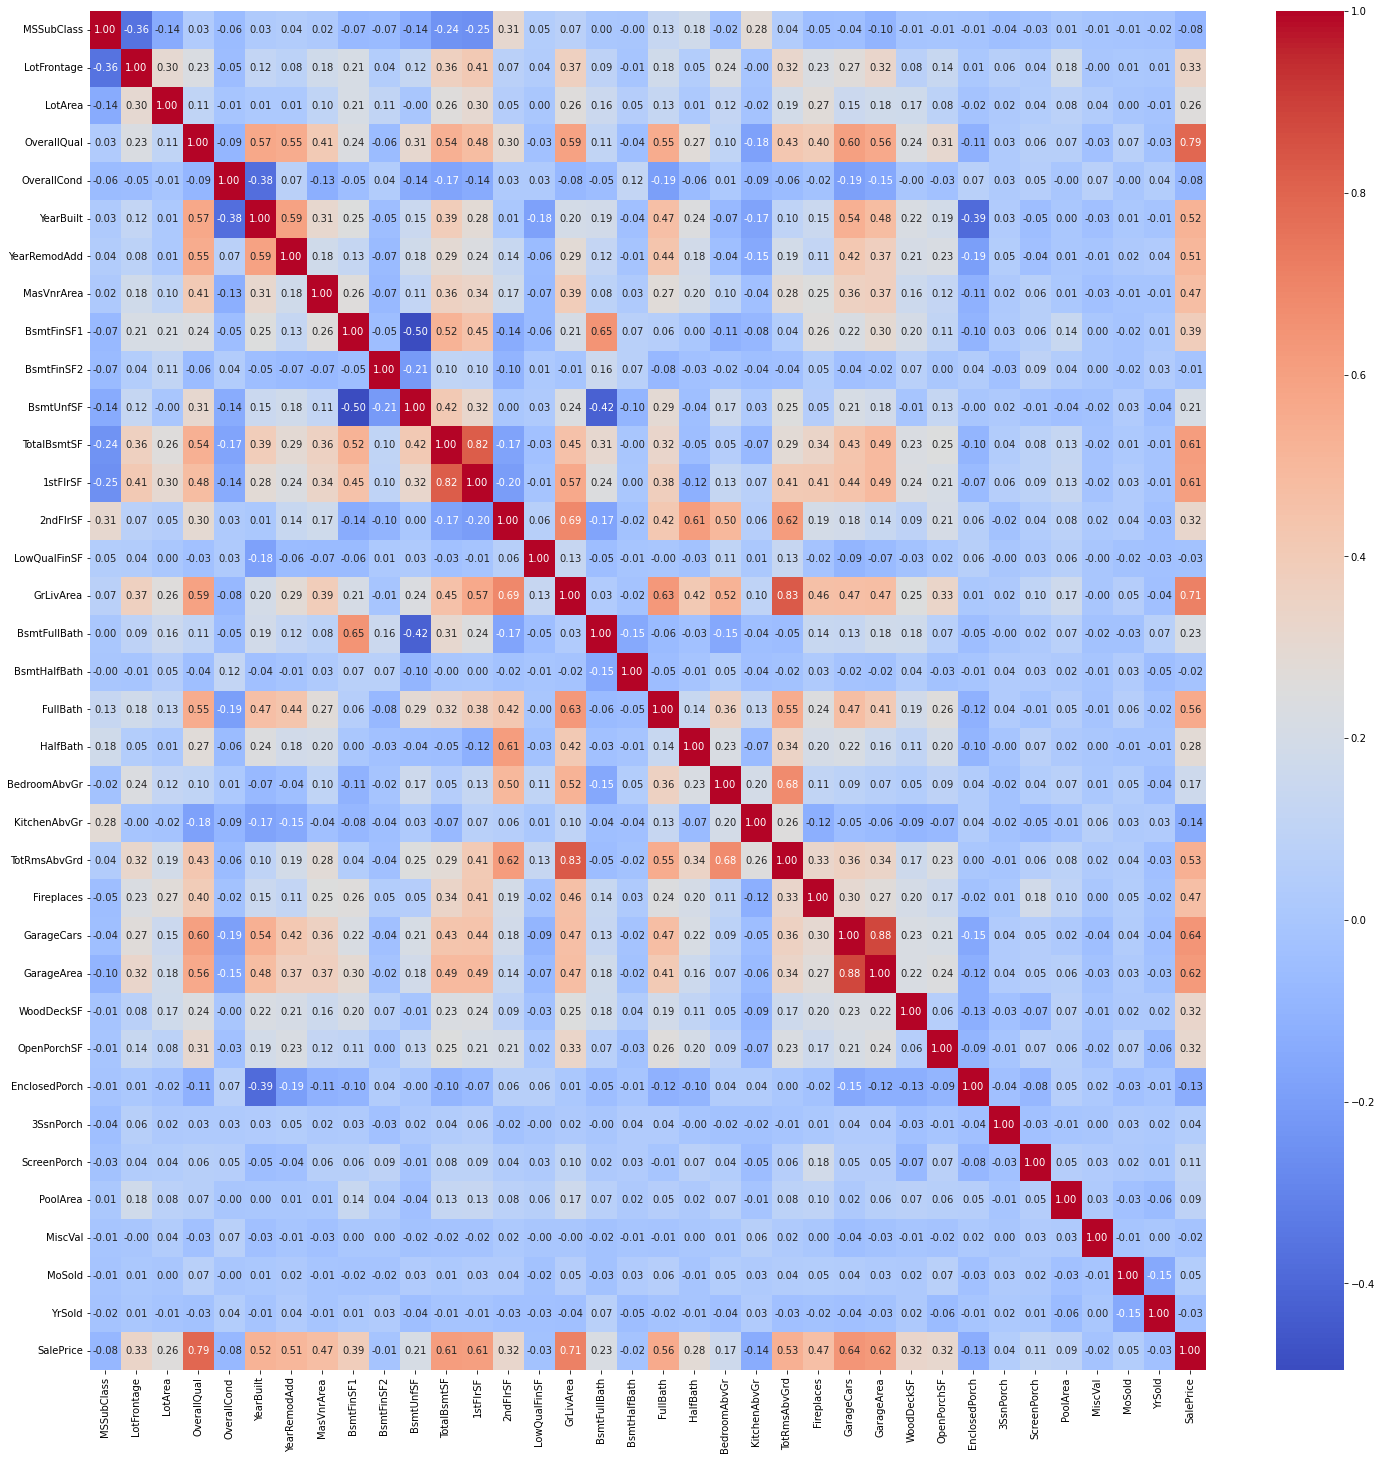

In [21]:
# checking corrlations

plt.figure(figsize=(25,25))
sns.heatmap(hou.corr(), annot=True, cmap='coolwarm', fmt='.2f')

#cmap ideas : Blues, coolwarm, cubehelix

In [22]:
cat_vars.shape

(39,)

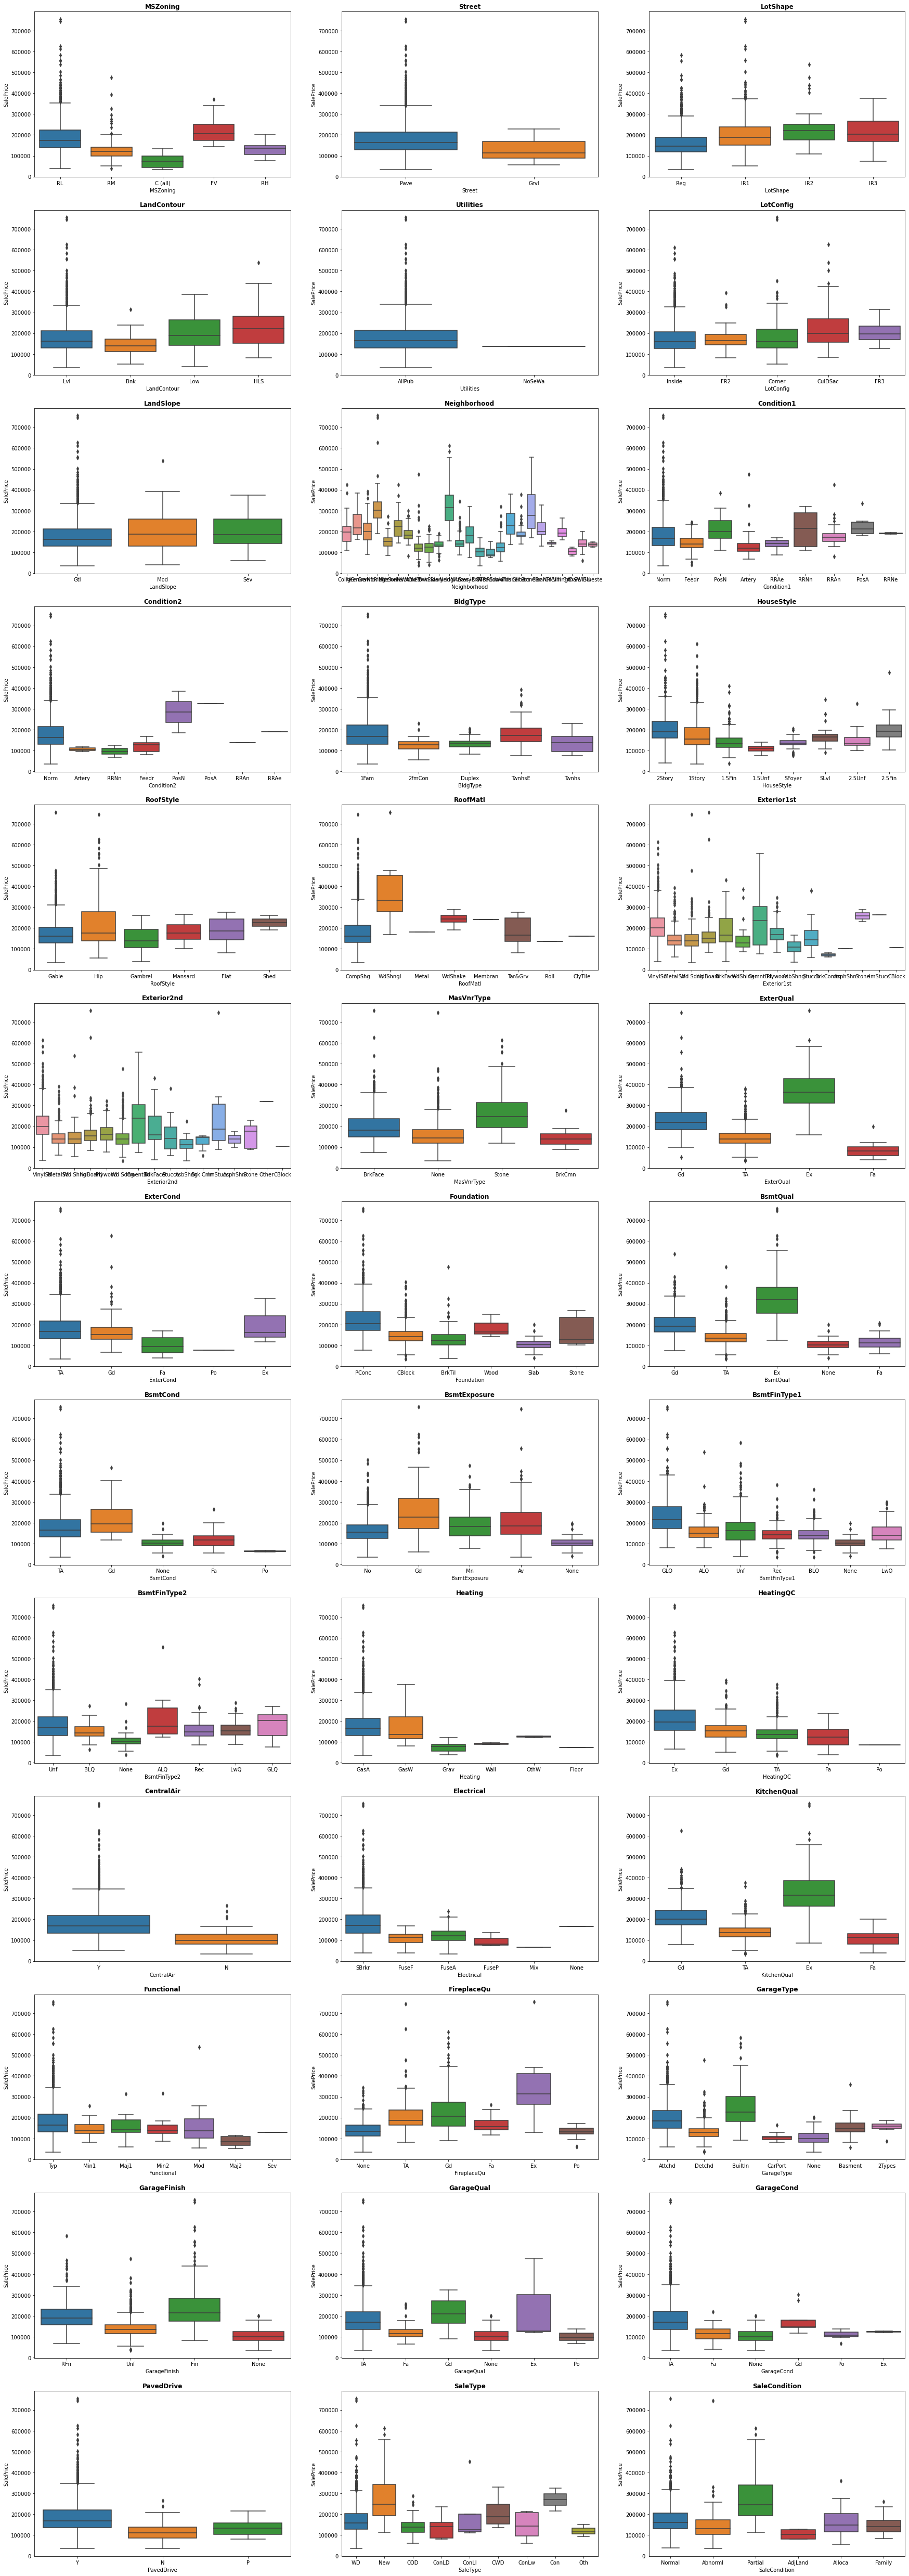

In [23]:
# Categorical column data analysis

plt.figure(figsize=(30,90))
itr = 1
for col in cat_vars:
    plt.subplot(13, 3, itr)
    sns.boxplot(x=hou[col], y=hou['SalePrice'])
    plt.title(col, weight='bold')
    itr += 1
    
plt.show()

In [24]:
num_vars.shape

(36,)

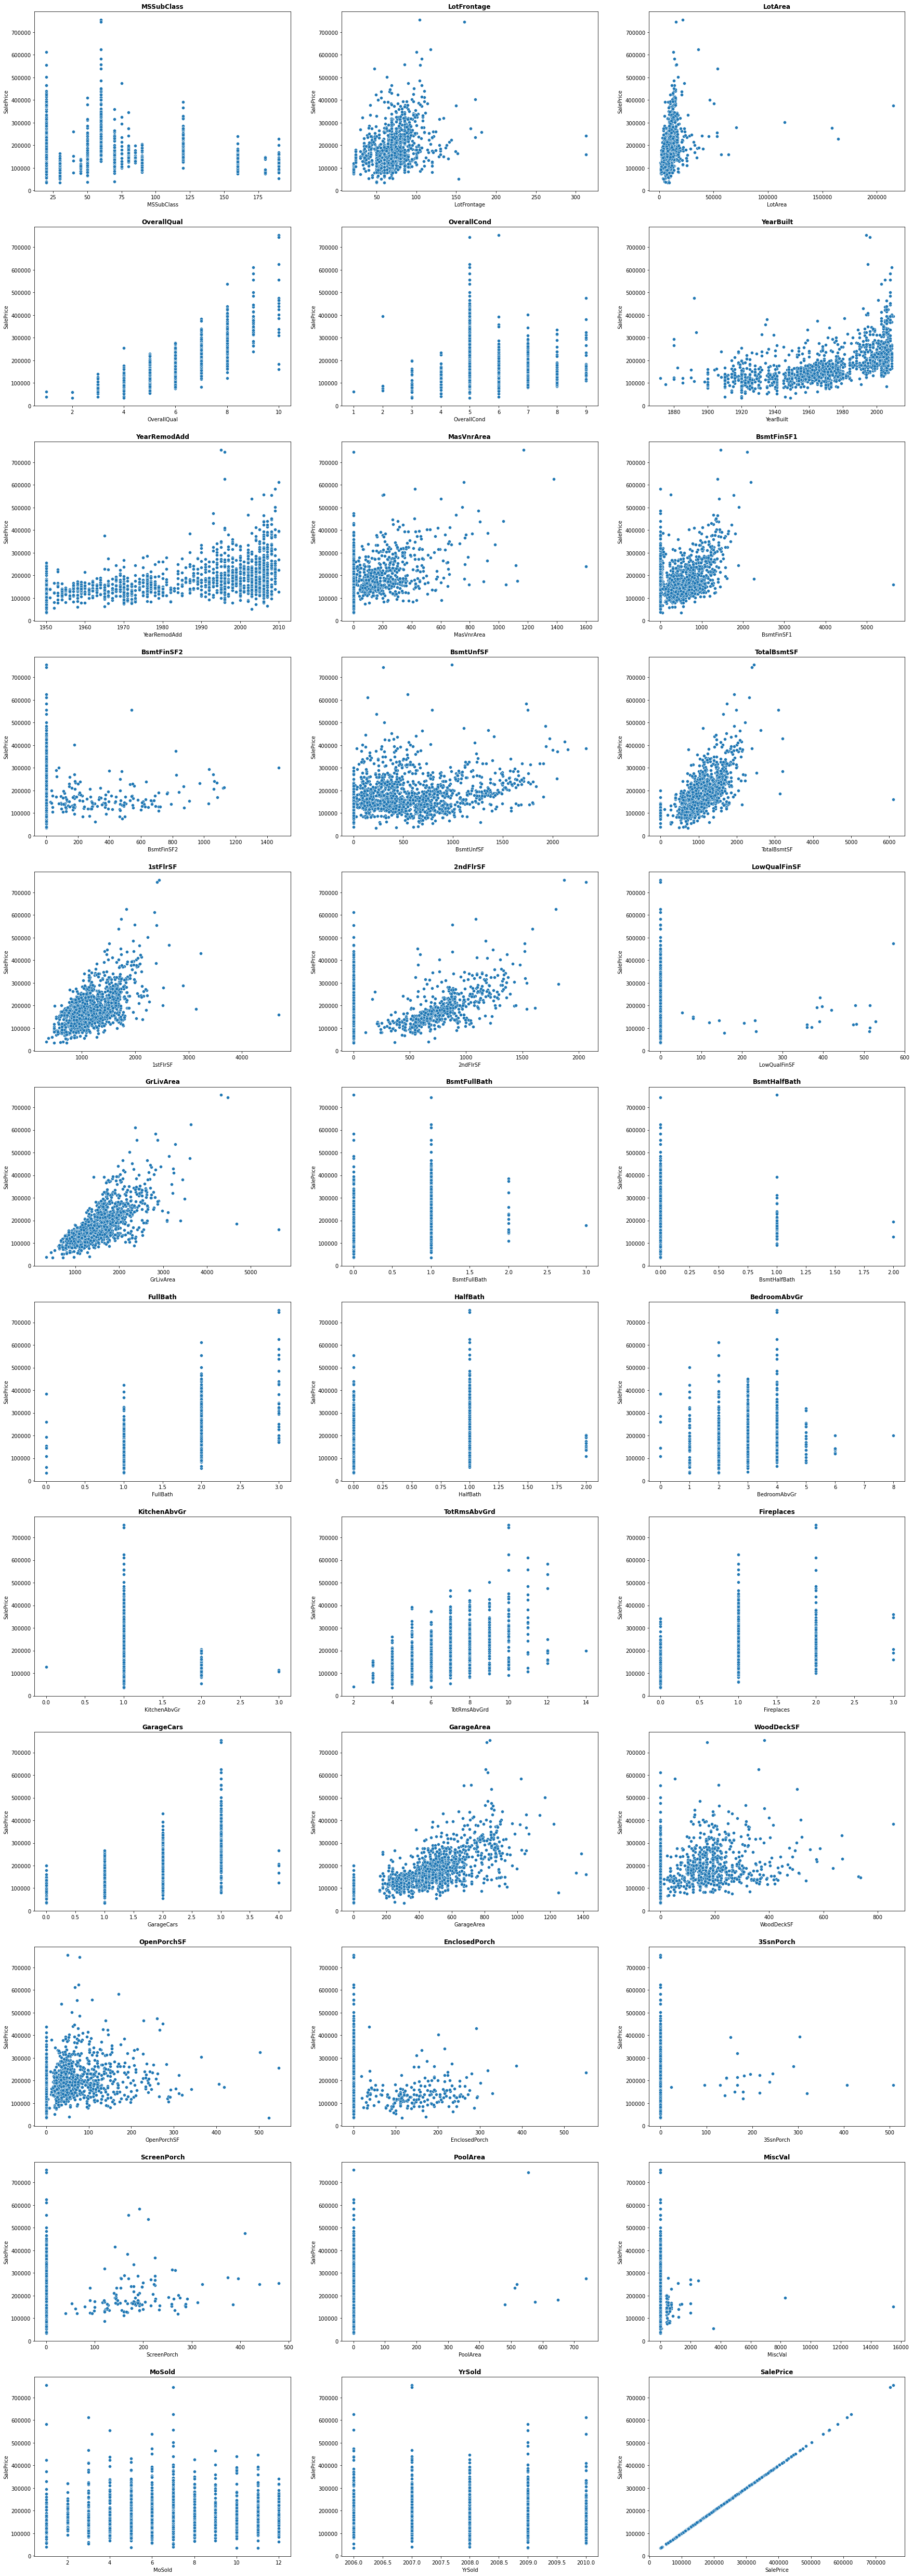

In [25]:
# Numerical column data analysis
plt.figure(figsize=(30,90))

itr = 1
for col in num_vars:
    plt.subplot(12, 3, itr)
    sns.scatterplot(x=hou[col], y=hou['SalePrice'])
    plt.title(col, weight='bold')
    itr += 1
    
plt.show()

#### <font color='DarkBlue'> Getting dummies for numeric representation of categorical variables </font>

In [26]:
## creating dummies for categorical vars

cat_dummies = pd.get_dummies(hou[cat_vars], drop_first=True)
cat_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [27]:
## concat numeric vars and categorical variable dummies to get the entire dataset

hou_f = pd.concat([hou[num_vars], cat_dummies],axis=1)
hou_f.shape

(1460, 247)

In [28]:
hou_f.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


#### <font color='DarkBlue'> Creating Testing and Training Sets and Rescaling Numeric Features </font>

In [29]:
# splitting data into training and testing sets

df_train, df_test = train_test_split(hou_f, train_size=0.7, test_size = 0.3, random_state=100)

In [30]:
## rescaling numeric features

scaler = StandardScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [31]:
## dividing into X and y for model building

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1021, 246) (1021,)
(438, 246) (438,)


In [33]:
# alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0,
                    8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

### <font color='DarkBlue'> Lasso Regression </font>

In [34]:
# Creating object
lasso = Lasso()

# cross validation
mod_lasso = GridSearchCV(estimator = lasso, param_grid = params, scoring = 'neg_mean_absolute_error', cv= 5,
                         return_train_score = True,
                         verbose = 1,
                         n_jobs=-1)

mod_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
mod_lasso.cv_results_

{'mean_fit_time': array([0.12995162, 0.08434   , 0.02138681, 0.01507635, 0.01716013,
        0.02027931, 0.01549702, 0.01486487, 0.01392002, 0.02182188,
        0.01231537, 0.01527734, 0.01681967, 0.01212931, 0.02044702,
        0.01297746, 0.01430707, 0.0196207 , 0.01130705, 0.01327791,
        0.01182179, 0.01275291, 0.01622677, 0.01637764, 0.01881552,
        0.01363878, 0.01534848]),
 'std_fit_time': array([0.0481091 , 0.00746459, 0.00353904, 0.0034934 , 0.00455928,
        0.00660602, 0.00313953, 0.00445043, 0.00302109, 0.0106416 ,
        0.00260709, 0.00546833, 0.01261451, 0.00419872, 0.01601549,
        0.00397043, 0.00509025, 0.01136982, 0.00141122, 0.00502434,
        0.00470543, 0.00399468, 0.00464139, 0.00747221, 0.00336729,
        0.00267532, 0.00229165]),
 'mean_score_time': array([0.00465355, 0.0021194 , 0.00293779, 0.00957632, 0.00274315,
        0.00679474, 0.00307021, 0.00593042, 0.00295463, 0.00572796,
        0.00470433, 0.00387406, 0.00620461, 0.01256094, 0.006038

In [36]:
# Best alpha value
mod_lasso.best_params_

{'alpha': 0.0001}

#### <font color='DarkBlue'> Lasso 1 : With best alpha value obtained </font>

In [37]:
## fitting the model with best alpha value

lasso1 = Lasso(alpha=0.0001)

In [38]:
## fitting model
lasso1.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [39]:
# checking variable coefficients

df = pd.DataFrame(list(zip(hou_f.columns, lasso1.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
114,RoofMatl_WdShake,8.257163
109,RoofMatl_CompShg,7.950307
108,RoofStyle_Shed,7.488787
110,RoofMatl_Membran,7.434091
112,RoofMatl_Roll,7.394614
113,RoofMatl_Tar&Grv,7.393598
111,RoofMatl_Metal,7.320774
87,Condition2_Norm,0.404744
67,Neighborhood_NWAmes,0.399701
13,2ndFlrSF,0.351742


In [40]:
# making predictions

y_train_pred = lasso1.predict(X_train)
y_test_pred = lasso1.predict(X_test)

In [41]:
## R2 test

#train r2
print("R-squared on Train set : ", r2_score(y_train, y_train_pred))

#test r2
print("R-squared on Test set : ", r2_score(y_test, y_test_pred))

R-squared on Train set :  0.9467735706800072
R-squared on Test set :  0.8383845670808144


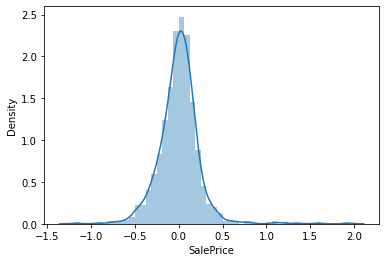

In [42]:
sns.distplot(y_train - y_train_pred)
plt.show()

#### <font color='DarkBlue'> Lasso 2 : With double the best alpha value obtained earlier </font>

In [43]:
## fitting lasso with twice the best alpha value

lasso2 = Lasso(alpha=0.0002)
lasso2.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [44]:
# reviewing coefficients from this model

df = pd.DataFrame(list(zip(hou_f.columns, lasso2.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)


,Feature,Coefficient
114,RoofMatl_WdShake,6.468186
109,RoofMatl_CompShg,5.709007
108,RoofStyle_Shed,5.673159
113,RoofMatl_Tar&Grv,5.574498
112,RoofMatl_Roll,5.471063
111,RoofMatl_Metal,5.423408
110,RoofMatl_Membran,5.328256
67,Neighborhood_NWAmes,0.447003
87,Condition2_Norm,0.327230
39,MSZoning_RM,0.319149


In [45]:
# R squared for lasso2
y_train_pred = lasso2.predict(X_train)
y_test_pred = lasso2.predict(X_test)

## R2 test

print("R-squared on Train set : ", r2_score(y_train, y_train_pred))
print("R-squared on Test set : ", r2_score(y_test, y_test_pred))

R-squared on Train set :  0.9415679892259755
R-squared on Test set :  0.8452776791053433


#### <font color='DarkBlue'> Lasso 3 : Post removing top 5 features with best alpha value obtained</font>

#### Top 5 significant variables obtained from the Lasso 1 : RoofMatl_WdShake, RoofMatl_CompShg, RoofStyle_Shed, RoofMatl_Membran, RoofMatl_Roll

In [46]:
## creating new train and test datasets

y_train_l = y_train
X_train_l = df_train.drop(['RoofMatl_WdShake','RoofMatl_CompShg','RoofStyle_Shed','RoofMatl_Membran','RoofMatl_Roll'],axis=1)

y_test_l = y_test
X_test_l = df_test.drop(['RoofMatl_WdShake','RoofMatl_CompShg','RoofStyle_Shed','RoofMatl_Membran','RoofMatl_Roll'],axis=1)


In [47]:
mod_lasso.fit(X_train_l, y_train_l)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [48]:
# Best alpha value
mod_lasso.best_params_

{'alpha': 0.001}

In [49]:
lasso3 = Lasso(alpha=0.001)
lasso3.fit(X_train_l, y_train_l)

Lasso(alpha=0.001)

In [50]:
# reviewing coefficients from this model

df = pd.DataFrame(list(zip(hou_f.columns, lasso3.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
109,RoofMatl_CompShg,0.724111
67,Neighborhood_NWAmes,0.545512
68,Neighborhood_NoRidge,0.362281
15,GrLivArea,0.327994
58,Neighborhood_CollgCr,0.302222
73,Neighborhood_SawyerW,0.270645
74,Neighborhood_Somerst,0.254760
162,BsmtQual_None,0.237250
112,RoofMatl_Roll,0.210514
130,Exterior2nd_AsphShn,0.185081


### <font color='DarkBlue'> Ridge Regression </font>

In [51]:
# creating ridge instance
ridge = Ridge()

# cross validation
mod_ridge = GridSearchCV(estimator = ridge, param_grid = params, scoring = 'neg_mean_absolute_error', cv= 5,
                         return_train_score = True,
                         verbose = 1,
                         n_jobs=-1)

mod_ridge.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
mod_ridge.cv_results_

{'mean_fit_time': array([0.02000055, 0.01799297, 0.02787018, 0.01424007, 0.01466932,
        0.01176839, 0.01210546, 0.01413817, 0.01626229, 0.01582427,
        0.01892405, 0.01591964, 0.01489162, 0.01789112, 0.01657724,
        0.0142127 , 0.01372442, 0.01314855, 0.01416793, 0.0156858 ,
        0.01579676, 0.01414413, 0.01373239, 0.01615238, 0.0162075 ,
        0.01615963, 0.01657982]),
 'std_fit_time': array([0.00390258, 0.00764074, 0.01640634, 0.00350447, 0.00400624,
        0.00323304, 0.00404187, 0.00422887, 0.00503981, 0.00463249,
        0.01044409, 0.00396165, 0.00487282, 0.00301195, 0.00357969,
        0.0023164 , 0.00374581, 0.00312595, 0.00424865, 0.00474436,
        0.00468   , 0.00423488, 0.00449399, 0.00422717, 0.00359981,
        0.00487258, 0.00296   ]),
 'mean_score_time': array([0.00565462, 0.00364952, 0.00210915, 0.00434766, 0.0043592 ,
        0.0077703 , 0.00403152, 0.0044488 , 0.00373416, 0.00444674,
        0.00403266, 0.00508618, 0.00400338, 0.00251384, 0.001446

In [53]:
# Best alpha value
mod_ridge.best_params_

{'alpha': 50}

#### <font color='DarkBlue'> Ridge 1 : With best alpha value obtained </font>

In [54]:
## fitting the model with best alpha value

ridge1 = Ridge(alpha=50)

In [55]:
## fitting model

ridge1.fit(X_train, y_train)

Ridge(alpha=50)

In [56]:
# checking variable coefficients

df = pd.DataFrame(list(zip(hou_f.columns, ridge1.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
3,OverallQual,0.216431
67,Neighborhood_NWAmes,0.185092
15,GrLivArea,0.172141
68,Neighborhood_NoRidge,0.160588
13,2ndFlrSF,0.139968
167,BsmtCond_TA,0.138938
78,Condition1_Feedr,0.118399
24,GarageCars,0.110705
58,Neighborhood_CollgCr,0.102159
172,BsmtFinType1_BLQ,0.080653


In [57]:
# predicting y's

y_train_pred = ridge1.predict(X_train)

y_test_pred = ridge1.predict(X_test)

In [58]:
## R2 Scores

#train r2
print("R-squared on Train set : ", r2_score(y_train, y_train_pred))

#test r2
print("R-squared on Test set : ", r2_score(y_test, y_test_pred))

R-squared on Train set :  0.869692823267323
R-squared on Test set :  0.8649788515327226


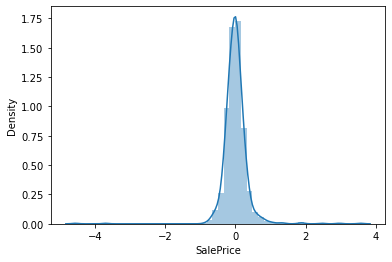

In [59]:
sns.distplot(y_train - y_train_pred)
plt.show()

#### <font color='DarkBlue'> Ridge 2 : With double the best alpha value obtained </font>

In [60]:
## ridge with twice the best alpha value

ridge2 = Ridge(alpha=100)

ridge2.fit(X_train, y_train)


Ridge(alpha=100)

In [61]:
df = pd.DataFrame(list(zip(hou_f.columns, ridge2.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
3,OverallQual,0.213433
15,GrLivArea,0.153806
67,Neighborhood_NWAmes,0.118828
13,2ndFlrSF,0.116329
68,Neighborhood_NoRidge,0.110145
167,BsmtCond_TA,0.103860
24,GarageCars,0.096961
78,Condition1_Feedr,0.095007
12,1stFlrSF,0.079674
172,BsmtFinType1_BLQ,0.074047


In [62]:
# making predictions
y_train_pred = ridge2.predict(X_train)
y_test_pred = ridge2.predict(X_test)

## R2 scores

print("R-squared on Train set : ", r2_score(y_train, y_train_pred))
print("R-squared on Test set : ", r2_score(y_test, y_test_pred))

R-squared on Train set :  0.8556059873732458
R-squared on Test set :  0.8591389964377256


#### <font color='DarkBlue'> Ridge 3 : Post removing top 5 features with best alpha value obtained</font>

#### The top 5 features from Ridge 1 : OverallQual, Neighborhood_NWAmes, GrLivArea, Neighborhood_NoRidge, 2ndFlrSF

In [63]:
## creating new train and test datasets

y_train_r = y_train
X_train_r = df_train.drop(['OverallQual', 'Neighborhood_NWAmes', 'GrLivArea', 'Neighborhood_NoRidge', '2ndFlrSF'],axis=1)

y_test_r = y_test
X_test_r = df_test.drop(['OverallQual', 'Neighborhood_NWAmes', 'GrLivArea', 'Neighborhood_NoRidge', '2ndFlrSF'],axis=1)


In [64]:
mod_ridge.fit(X_train_r, y_train_r)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
# Best alpha value
mod_ridge.best_params_

{'alpha': 20}

In [66]:
## fitting the model with best alpha value

ridge3 = Ridge(alpha=20)


ridge3.fit(X_train_r, y_train_r)

Ridge(alpha=20)

In [67]:
df = pd.DataFrame(list(zip(hou_f.columns, ridge3.coef_)),columns=['Feature','Coefficient'])
df.sort_values(by='Coefficient',ascending=False).head(10)

,Feature,Coefficient
109,RoofMatl_CompShg,0.218570
162,BsmtQual_None,0.206987
63,Neighborhood_MeadowV,0.197793
55,Neighborhood_BrDale,0.185895
11,TotalBsmtSF,0.165814
167,BsmtCond_TA,0.156927
130,Exterior2nd_AsphShn,0.144647
73,Neighborhood_SawyerW,0.136745
69,Neighborhood_NridgHt,0.135164
19,HalfBath,0.134268
